# Shelter Animal Outcomes
Javier Castellanos <br>
Ingeniería de Sistemas <br>
Universidad Industrial de Santander <br>
<img src= "img/front_page.png" style="position:absolute; left:63%; top:7%; width:16%"/>
2017 <br><br>
Usando los datos que se encuentran en la competencia de Kaggle: [Shelter Animal Outcomes](https://www.kaggle.com/c/shelter-animal-outcomes) se aplicarán los conocimientos obtenidos en clase. Se realizarán exploraciones, gráficas, análisis y tratamiento a los datos, y se probará entrenar un clasificador para dar solución a la tarea propuesta en la competencia.
## Librerías:

In [110]:
import numpy as np #Para el manejo de vectores
import pandas as pd #Para el manejo de los datos
import matplotlib.pyplot as plt #Para las graficas

from sklearn.naive_bayes import GaussianNB # Clasificador
from sklearn.tree import DecisionTreeClassifier # Clasificador
import matplotlib.lines as mlines
from sklearn.cross_validation import train_test_split, KFold, cross_val_score

plt.style.use('ggplot')
%matplotlib inline

## Inclusión de los Datos:

In [3]:
#Importa datos de /data
data_train = pd.read_csv('data/train.csv')

## Exploración de los Datos:

In [4]:
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
size = data_train.shape
print('Cantidad Animales: ', size[0], '\nCantidad de Datos Por Animal: ', size[1])

Cantidad Animales:  26729 
Cantidad de Datos Por Animal:  10


In [6]:
clases = sorted(data_train['OutcomeType'].unique())
print('Clases: ',clases)

Clases:  ['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']


In [7]:
size_dog = data_train.AnimalType.value_counts()[0]
size_cat = data_train.AnimalType.value_counts()[1]
data_train.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [8]:
data_train[:0]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color


Como se puede observar los datos consisten en información variada sobre animales, en especial perros y gatos. Al ver las clases se intuye que se trata de información de animales que entran a una veterinaria. Algunas entradas no tienen los datos completos por ejemplo hay animales sin nombre, esta ausencia de datos podría estar causada por varias razones, los datos no fueron ingresados completos o en el caso de los nombres puede que hayan tomado animales de la calle para tratamiento.

In [9]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n{v:d}'.format(p=pct,v=val)
    return my_autopct

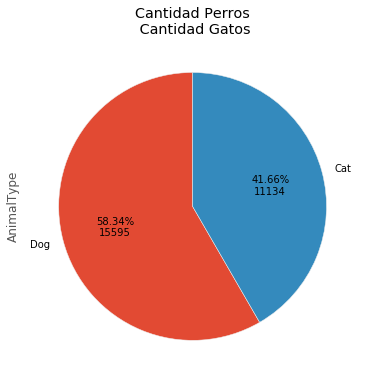

In [10]:
#Numero de Gatos vs Numero de Perros
serie = data_train['AnimalType'].value_counts()
a = serie.plot.pie(figsize=(6, 6), autopct=make_autopct([size_dog,size_cat]), startangle=90, title="Cantidad Perros\n Cantidad Gatos")

Hay una mayor cantidad de perros que gatos, aunque la diferencia no es muy grande. Con este tipo de información se podrían plantear varias preguntas y darles solución. Se podría obtener información sobre el comportamiento de la población con sus mascotas, por ejemplo, sabiendo que hay animales con nombre y otros sin nombre, y si los animales sin nombre son aquellos que recogieron de la calle o fueron abandonados, podría saber la relación entre los animales abandonados y los que no.

También se puede conocer la preferencia de las personas al comprar mascotas, observando la cantidad de gatos y perros.

In [11]:
#Gatos con nombre y Perros con nombre
cat_with_name = data_train[data_train.AnimalType == 'Cat']['Name'].count()
dog_with_name = data_train[data_train.AnimalType == 'Dog']['Name'].count()
modelos = ['Dog','Cat']
scores = ["Con Nombre", "Sin Nombre"]


dict_pandas = {'Dog': [dog_with_name,size_dog-dog_with_name], 'Cat': [cat_with_name,size_cat-cat_with_name]}

comparacion = pd.DataFrame(dict_pandas, columns=modelos, index= scores)

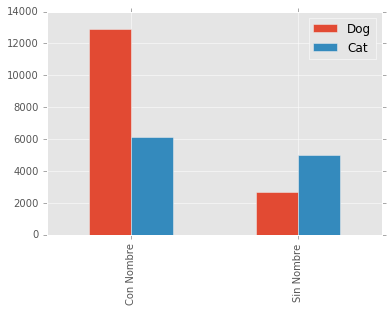

In [12]:
comparacion.plot.bar()

Al saber que hay más perros que gatos se puede inferir la preferencia hacia las mascotas, incluso viendo la gráfica se observa que los perros son abandonados en menor proporción que los gatos, ya que de estos prácticamente la mitad no tiene dueño.

In [13]:
#Perros y gatos sin nombre en las distintas categorias

# Transfer Cat without name
aux_one = data_train[data_train.OutcomeType  == 'Transfer']
aux_two = aux_one[aux_one.AnimalType == 'Cat']
cat_without_name_transfer = aux_two[aux_two.Name.isnull()].shape[0]

# Transfer Dog without name
aux_one = data_train[data_train.OutcomeType  == 'Transfer']
aux_two = aux_one[aux_one.AnimalType == 'Dog']
dog_without_name_transfer = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Return_to_owner']
aux_two = aux_one[aux_one.AnimalType == 'Cat']
cat_without_name_return = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Return_to_owner']
aux_two = aux_one[aux_one.AnimalType == 'Dog']
dog_without_name_return = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Euthanasia']
aux_two = aux_one[aux_one.AnimalType == 'Cat']
cat_without_name_eutanasia = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Euthanasia']
aux_two = aux_one[aux_one.AnimalType == 'Dog']
dog_without_name_eutanasia = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Adoption']
aux_two = aux_one[aux_one.AnimalType == 'Cat']
cat_without_name_adoption = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Adoption']
aux_two = aux_one[aux_one.AnimalType == 'Dog']
dog_without_name_adoption = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Died']
aux_two = aux_one[aux_one.AnimalType == 'Cat']
cat_without_name_died = aux_two[aux_two.Name.isnull()].shape[0]

aux_one = data_train[data_train.OutcomeType  == 'Died']
aux_two = aux_one[aux_one.AnimalType == 'Dog']
dog_without_name_died = aux_two[aux_two.Name.isnull()].shape[0]

In [14]:
modelos = clases
scores = ['Dog','Cat']

dict_clases = {'Return_to_owner': [dog_without_name_return, cat_without_name_return], 'Euthanasia':[dog_without_name_eutanasia, cat_without_name_eutanasia], 'Adoption':[dog_without_name_adoption, cat_without_name_adoption],'Transfer': [dog_without_name_transfer, cat_without_name_transfer], 'Died':[dog_without_name_died, cat_without_name_died]}
dog_cat_clases_without_name = pd.DataFrame(dict_clases, columns=modelos, index= scores)

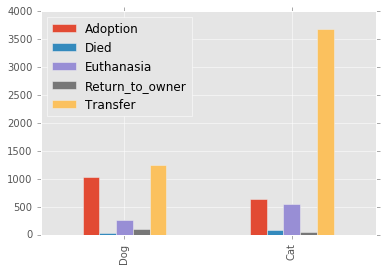

In [15]:
dog_cat_clases_without_name.plot.bar()

La premisa de que los animales sin nombre son abandonados no esta tan errada, como se puede observar en la gráfica es muy pequeña la proporción de animales sin nombre que deben ser devueltos a su dueño, aquí confirmamos la preferencia de los perros que los gatos. Se puede averiguar la preferencia de las personas por ciertas razas de perros y gatos, incluso las preferencias del color en los animales y mucha información.

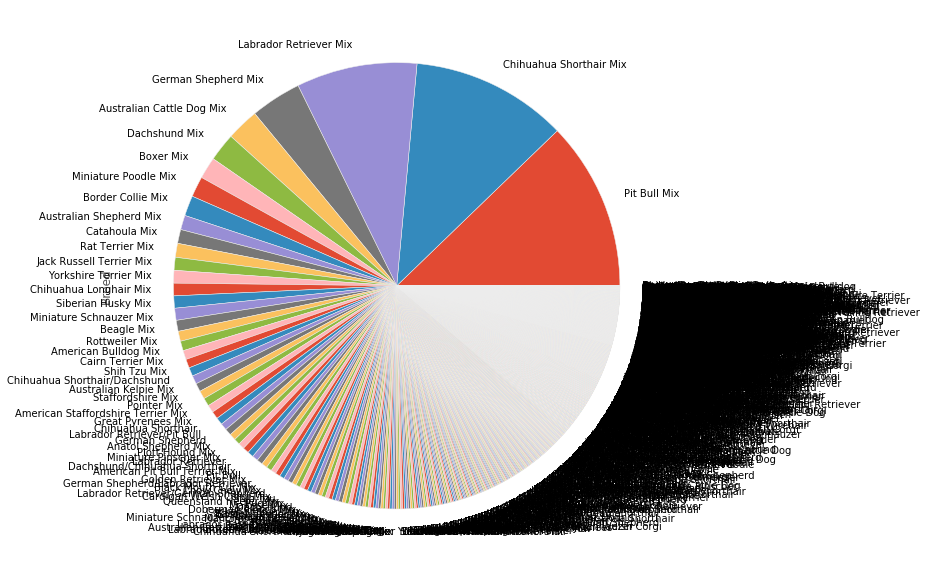

In [90]:
data_train[data_train.AnimalType == 'Dog'].Breed.value_counts().plot.pie(figsize=(10,10))

In [93]:
data_train[data_train.AnimalType == 'Dog'].Breed.value_counts().head()

Pit Bull Mix                 1906
Chihuahua Shorthair Mix      1766
Labrador Retriever Mix       1363
German Shepherd Mix           575
Australian Cattle Dog Mix     367
Name: Breed, dtype: int64

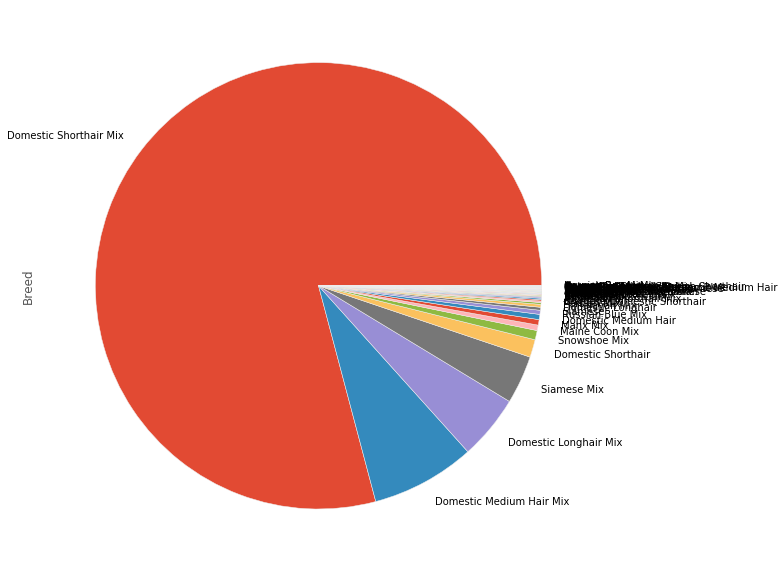

In [91]:
cat_breed = data_train[data_train.AnimalType == 'Cat'].Breed.value_counts().plot.pie(figsize=(10,10))

In [95]:
data_train[data_train.AnimalType == 'Cat'].Breed.value_counts().head()

Domestic Shorthair Mix      8810
Domestic Medium Hair Mix     839
Domestic Longhair Mix        520
Siamese Mix                  389
Domestic Shorthair           143
Name: Breed, dtype: int64

Se puede observar la diversidad en las razas de perros y la preferencia por los Pitbull de misma manera se ve la alta preferencia por los gatos Domestic Shorthair.
## Conversión de datos a números
Dado que, la mayoría de los datos son de tipo string y los clasificadores funcionan con datos de tipo numérico, se realiza un tipo de conversión de string a entero, es decir a cada palabra por columna se le asigna un número.

In [33]:
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


La conversión se realizará de la siguiente manera:
1. La columna AnimalID se eliminará.
2. La fecha se convertirá en un entero dado por YYMMDDHHMMSS
3. La columna OutcomeType se usará como el objetivo de clasificación, así que se extraerá de los datos de X_train, y se tomarán como y_train y a cada estado del animal (Adoption, Died, etc) se le asignará un número.
4. A cada palabra de la columna Name, OutcomeSubtype, AnimalType, Breed, Color, SexuponOutcome se le asignara un número.
5. Cada dato de AgeuponOutcome se llevará a su valor en días.


In [97]:
def conversion(column, column_type):
    
    #Asigna un numero a cada palabra unica en el vector
    if column_type == 'String':
        clases = np.unique(column.values)
        clases_num = np.array(clases.shape[0])
        aux_y = np.array(column.values)
        lista_convertida = np.ones(len(aux_y)).reshape(len(aux_y),1)
        for i,n in enumerate(aux_y):
            for j,l in enumerate(clases):
                if (n == l):
                    lista_convertida[i] = j
    
    # Toma la fecha, la concatena y la vuelve un entero          
    if column_type == 'Date':
        lista_convertida = np.ones(len(column.values)).reshape(len(column.values),1)
        for i,j in enumerate(column):
            lista_convertida[i] = int(j[:4]+j[5:7]+j[8:10]+j[11:13]+j[14:16]+j[17:19])

    # Convierte todo a dias
    if column_type == 'Years':
        lista_convertida = np.ones(len(column.values)).reshape(len(column.values),1)
        for i,j in enumerate(column):
            if j[2:] == 'years':
                lista_convertida[i] = int(j[:2])*360
            
            if j[2:] == 'months':
                    lista_convertida[i] = int(j[:2])*30
            
            if j[2:] == 'weeks':
                lista_convertida[i] = int(j[:2])*7
            
            if j[2:] == 'days':
                lista_convertida[i] = int(j[:2])
            
            if j == 'NaN':
                lista_convertida[i] = 0               
            
    return np.array(lista_convertida)

In [98]:
# Extrae Columna AnimalID
data_train.drop(['AnimalID'], axis = 1)
data_zeros = data_train.fillna("NaN")

# X train
num_name = conversion(data_zeros['Name'], 'String')
num_datetime = conversion(data_zeros['DateTime'], 'Date')
num_outcomesubtype = conversion(data_zeros['OutcomeSubtype'], 'String')
num_animaltype = conversion(data_zeros['AnimalType'], 'String')
num_sexu = conversion(data_zeros['SexuponOutcome'], 'String')
num_age = conversion(data_zeros['AgeuponOutcome'], 'Years')
num_breed = conversion(data_zeros['Breed'], 'String')
num_color = conversion(data_zeros['Color'], 'String')
X_train = np.concatenate((num_name, num_datetime, num_outcomesubtype, num_animaltype, num_sexu, num_age, num_breed, num_color), axis = 1)

# Y train
y_train = conversion(data_zeros['OutcomeType'], 'String')

In [99]:
X_train, y_train

(array([[  2.35100000e+03,   2.01402122e+13,   1.10000000e+01, ...,
           1.00000000e+00,   1.22100000e+03,   1.30000000e+02],
        [  1.84700000e+03,   2.01310131e+13,   1.60000000e+01, ...,
           1.00000000e+00,   6.40000000e+02,   1.67000000e+02],
        [  4.44100000e+03,   2.01501311e+13,   6.00000000e+00, ...,
           7.20000000e+02,   1.06600000e+03,   8.60000000e+01],
        ..., 
        [  6.34000000e+03,   2.01503091e+13,   1.10000000e+01, ...,
           1.44000000e+03,   1.02200000e+03,   3.53000000e+02],
        [  4.08000000e+03,   2.01404271e+13,   1.30000000e+01, ...,
           2.80000000e+01,   6.40000000e+02,   5.00000000e+00],
        [  4.08000000e+03,   2.01507021e+13,   1.50000000e+01, ...,
           1.00000000e+00,   6.40000000e+02,   1.11000000e+02]]), array([[ 3.],
        [ 2.],
        [ 0.],
        ..., 
        [ 0.],
        [ 4.],
        [ 4.]]))

## Entrenamiento

In [155]:
# estimadores
g = GaussianNB()
dtc = DecisionTreeClassifier()
dtc_max_depth_5 = DecisionTreeClassifier(max_depth = 5)
dtc_max_depth_10 = DecisionTreeClassifier(max_depth = 10)


In [158]:
# Entrenamiento y prediccion

# Gaussian
g_score = np.mean(cross_validation.cross_val_score(g,X_train, y_train.flatten(), cv = 10))

# DecisionTree
dtc_score = np.mean(cross_validation.cross_val_score(dtc,X_train, y_train.flatten(), cv = 10))
dtc_5_score = np.mean(cross_validation.cross_val_score(dtc_max_depth_5,X_train, y_train.flatten(), cv = 10))
dtc_10_score = np.mean(cross_validation.cross_val_score(dtc_max_depth_10,X_train, y_train.flatten(), cv = 10))

print("Modelos")
print("Gaussian --------------------------------------- score: ", g_score)
print("DecisionTreeClassifier() ----------------------- score: ", dtc_score)
print("DecisionTreeClassifier(max_depth = 5) ---------- score: ", dtc_5_score)
print("DecisionTreeClassifier(max_depth = 10) --------- score: ", dtc_10_score)

Modelos
Gaussian --------------------------------------- score:  0.402895853619
DecisionTreeClassifier() ----------------------- score:  0.83052199802
DecisionTreeClassifier(max_depth = 5) ---------- score:  0.833403329245
DecisionTreeClassifier(max_depth = 10) --------- score:  0.857383801371


El DecisionTreeClassifier fue el que mejores resultados mostro. Se entrenaron otros modelos como un SVC, un RandomForestClassifier, entre otros, pero ninguno dio buenos resultados.

In [137]:
def learning_curve_or_tree_progress(x_train,y_train,type_graph = "lc",algorithm = None):
    
    if type_graph == "tp":
        max_depths = range(1,21)
        r = np.array([(np.mean(j), np.std(j)) for j in [cross_val_score(DecisionTreeClassifier(max_depth=i),x_train,y_train,cv=KFold(len(x_train), 5)) for i in max_depths]])
        plt.figure(figsize = (15,5))
        plt.plot(max_depths, r[:,0], "o-", color="green", label="test")
        plt.fill_between(max_depths, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
        plt.xlabel("Max depth of the algorithm.")
        plt.ylabel("accuracy")
        plt.grid(True);
        green_line = mlines.Line2D([], [], color='green',label='test')
        plt.legend(handles=[green_line])
        plt.title('Max depth Learning')
        plt.show()

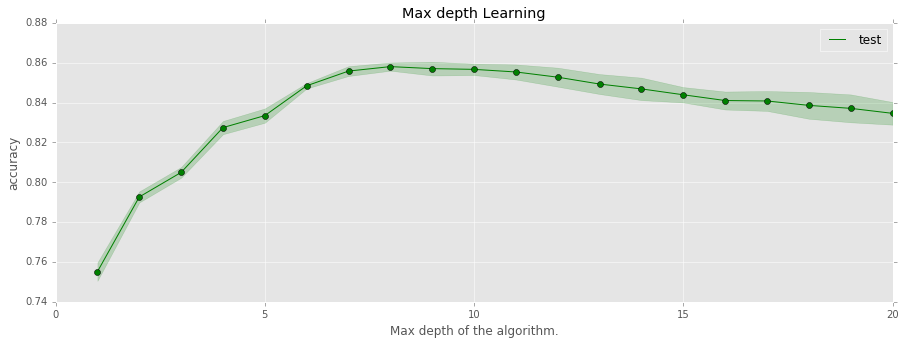

In [138]:
learning_curve_or_tree_progress(X_train,y_train,"tp")

Se puede observar como despues de cierta cantidad de depth  el aprendisaje disminuye, asi que se toma un max_depth entre 6 y 10 para un mejor resultado.

# Conclusiones

1. Conociendo el tipo de informacion que se posee y buenos conocimientos en pandas se puede extraer informacion extra del dataset.
2. La forma en que se combirtieron los datos de tipo caracter a tipo numerico, dio buenos frutos para el DessicionTreeClassifier, otro tipo de conversion hubiera sido peor o mejor para este clasificador o para otros.